Reading Data and Checking Missing Value

In [21]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("mushroom_dataset_new.csv", na_values ="?")
#na_values menambahkan aturan tambahan karena ? merupakan null

PreProcessing

In [22]:
from sklearn.preprocessing import LabelEncoder

#mengecek jumlah data yang kosong atau missing value
#print(data.isnull().sum()) #Tidak ada data yang kosong / missing
data.info() #Untuk menampilkan info data seperti Dtype dan jumlah data yang null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8416 non-null   object
 1   cap-surface               8416 non-null   object
 2   cap-color                 8416 non-null   object
 3   bruises                   8416 non-null   object
 4   odor                      8416 non-null   object
 5   gill-attachment           8416 non-null   object
 6   gill-spacing              8416 non-null   object
 7   gill-size                 8416 non-null   object
 8   gill-color                8416 non-null   object
 9   stalk-shape               8416 non-null   object
 10  stalk-root                5936 non-null   object
 11  stalk-surface-above-ring  8416 non-null   object
 12  stalk-surface-below-ring  8416 non-null   object
 13  stalk-color-above-ring    8416 non-null   object
 14  stalk-color-below-ring  

In [23]:
print("Dataset shape:", data.shape) #Untuk menampilkan bentuk data, total data dan jumlah kolom

Dataset shape: (8416, 22)


In [24]:
print(data["mushroom"].unique()) #Untuk menampilkan data yang muncul pada kolom mushroom

['EDIBLE' 'POISONOUS']


In [25]:
# del data["stalk-root"]
# print(data.isnull().sum())

data ["stalk-root"] = data["stalk-root"].fillna("NoData")
data = data.astype('category') #mengubah tipe data object menjadi category
data.info()
data["stalk-root"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8416 non-null   category
 1   cap-surface               8416 non-null   category
 2   cap-color                 8416 non-null   category
 3   bruises                   8416 non-null   category
 4   odor                      8416 non-null   category
 5   gill-attachment           8416 non-null   category
 6   gill-spacing              8416 non-null   category
 7   gill-size                 8416 non-null   category
 8   gill-color                8416 non-null   category
 9   stalk-shape               8416 non-null   category
 10  stalk-root                8416 non-null   category
 11  stalk-surface-above-ring  8416 non-null   category
 12  stalk-surface-below-ring  8416 non-null   category
 13  stalk-color-above-ring    8416 non-null   catego

0       BULBOUS
1       BULBOUS
2       BULBOUS
3       BULBOUS
4       BULBOUS
         ...   
8411     NoData
8412     NoData
8413     NoData
8414     NoData
8415     NoData
Name: stalk-root, Length: 8416, dtype: category
Categories (5, object): ['BULBOUS', 'CLUB', 'EQUAL', 'NoData', 'ROOTED']

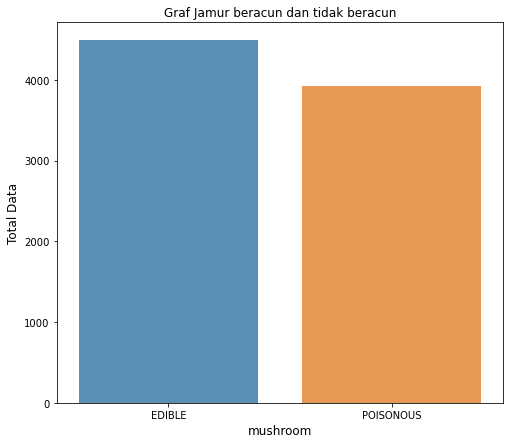

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

count = data['mushroom'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="tab10")
plt.ylabel('Total Data', fontsize=12)
plt.xlabel('mushroom', fontsize=12)
plt.title('Graf Jamur beracun dan tidak beracun')
plt.show()
#Untuk menampilkan graf perbedaan record 'edible' dan 'poisonous' pada kolom mushroom.

In [27]:
i = 1
for column in data.columns:
    occur = data.groupby([column]).size()
    display(occur)
    print(i)
    i+=1
#Untuk menampilkan data yang muncul pada tiap kolom. Sangat berguna apabila ingin mencari tahu record-record sebelum di encoding

cap-shape
BELL        452
CONICAL       4
CONVEX     3796
FLAT       3292
KNOBBED     840
SUNKEN       32
dtype: int64

1


cap-surface
FIBROUS    2460
GROOVES       4
SCALY      3268
SMOOTH     2684
dtype: int64

2


cap-color
BROWN       2320
BUFF         168
CINNAMON      44
GRAY        2096
GREEN         16
PINK         144
PURPLE        16
RED         1500
WHITE       1040
YELLOW      1072
dtype: int64

3


bruises
BRUISES    3376
NO         5040
dtype: int64

4


odor
ALMOND       400
ANISE        400
CREOSOTE     192
FISHY        576
FOUL        2160
MUSTY         48
NONE        3808
PUNGENT      256
SPICY        576
dtype: int64

5


gill-attachment
ATTACHED     216
FREE        8200
dtype: int64

6


gill-spacing
CLOSE      6824
CROWDED    1592
dtype: int64

7


gill-size
BROAD     5880
NARROW    2536
dtype: int64

8


gill-color
BLACK         472
BROWN        1112
BUFF         1728
CHOCOLATE     796
GRAY          752
GREEN          24
ORANGE         64
PINK         1556
PURPLE        492
RED            96
WHITE        1232
YELLOW         92
dtype: int64

9


stalk-shape
ENLARGING    3552
TAPERING     4864
dtype: int64

10


stalk-root
BULBOUS    3800
CLUB        568
EQUAL      1376
NoData     2480
ROOTED      192
dtype: int64

11


stalk-surface-above-ring
FIBROUS     692
SCALY        24
SILKY      2384
SMOOTH     5316
dtype: int64

12


stalk-surface-below-ring
FIBROUS     740
SCALY       296
SILKY      2304
SMOOTH     5076
dtype: int64

13


stalk-color-above-ring
BROWN        448
BUFF         432
CINNAMON      48
GRAY         576
ORANGE       192
PINK        1872
RED           96
WHITE       4744
YELLOW         8
dtype: int64

14


stalk-color-below-ring
BROWN        536
BUFF         432
CINNAMON      48
GRAY         576
ORANGE       192
PINK        1872
RED           96
WHITE       4640
YELLOW        24
dtype: int64

15


veil-color
BROWN       96
ORANGE      96
WHITE     8216
YELLOW       8
dtype: int64

16


ring-number
NONE      48
ONE     7768
TWO      600
dtype: int64

17


ring-type
EVANESCENT    3056
FLARING         48
LARGE         1296
NONE            48
PENDANT       3968
dtype: int64

18


spore-print-color
BLACK        2000
BROWN        2096
BUFF           48
CHOCOLATE    1632
GREEN          72
ORANGE         48
PURPLE         48
WHITE        2424
YELLOW         48
dtype: int64

19


population
ABUNDANT      512
CLUSTERED     352
NUMEROUS      400
SCATTERED    1376
SEVERAL      4064
SOLITARY     1712
dtype: int64

20


habitat
GRASSES    2404
LEAVES      856
MEADOWS     292
PATHS      1144
URBAN       368
WASTE       192
WOODS      3160
dtype: int64

21


mushroom
EDIBLE       4488
POISONOUS    3928
dtype: int64

22


In [28]:

# le = LabelEncoder()

# for i in range(0, 21):
#     data[:, i] = le.fit_transform(data[:, i])

labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

data_2 = data.values
X = data_2[:, 1:-1]
y = data_2[:, -1]

[Text(0, 0, 'cap-shape'),
 Text(1, 0, 'cap-surface'),
 Text(2, 0, 'cap-color'),
 Text(3, 0, 'bruises'),
 Text(4, 0, 'odor'),
 Text(5, 0, 'gill-attachment'),
 Text(6, 0, 'gill-spacing'),
 Text(7, 0, 'gill-size'),
 Text(8, 0, 'gill-color'),
 Text(9, 0, 'stalk-shape'),
 Text(10, 0, 'stalk-root'),
 Text(11, 0, 'stalk-surface-above-ring'),
 Text(12, 0, 'stalk-surface-below-ring'),
 Text(13, 0, 'stalk-color-above-ring'),
 Text(14, 0, 'stalk-color-below-ring'),
 Text(15, 0, 'veil-color'),
 Text(16, 0, 'ring-number'),
 Text(17, 0, 'ring-type'),
 Text(18, 0, 'spore-print-color'),
 Text(19, 0, 'population'),
 Text(20, 0, 'habitat')]

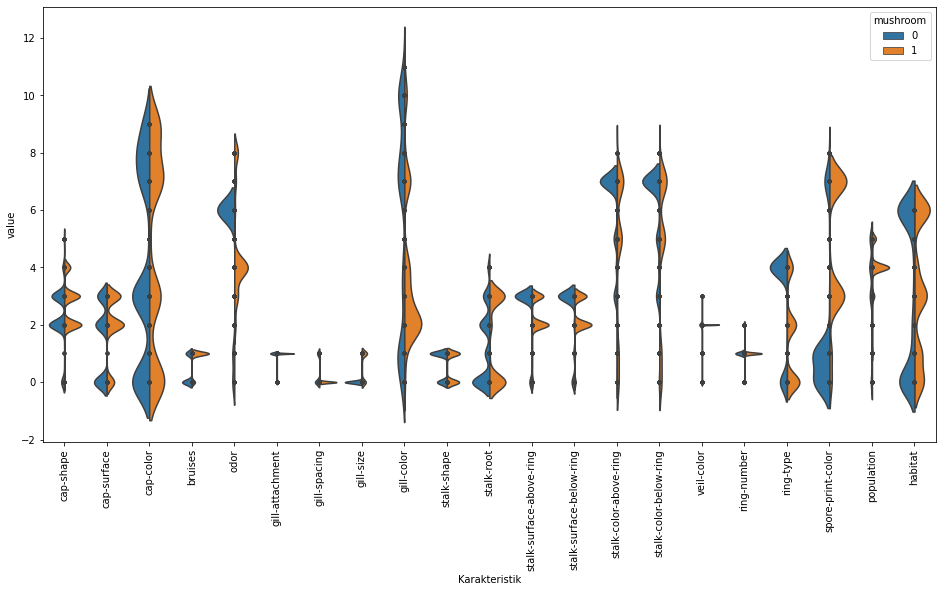

In [29]:
data_div = pd.melt(data, "mushroom", var_name="Karakteristik")
fig, ax = plt.subplots(figsize=(16,8))
p = sns.violinplot(ax = ax, x="Karakteristik", y="value", hue="mushroom", split = True, data=data_div, inner = 'point', palette = 'tab10')
data_no_mushroom = data.drop(["mushroom"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(data_no_mushroom.columns))

In [30]:
i = 1
for column in data.columns:
    occur = data.groupby([column]).size()
    display(occur)
    print(i)
    i+=1

cap-shape
0     452
1       4
2    3796
3    3292
4     840
5      32
dtype: int64

1


cap-surface
0    2460
1       4
2    3268
3    2684
dtype: int64

2


cap-color
0    2320
1     168
2      44
3    2096
4      16
5     144
6      16
7    1500
8    1040
9    1072
dtype: int64

3


bruises
0    3376
1    5040
dtype: int64

4


odor
0     400
1     400
2     192
3     576
4    2160
5      48
6    3808
7     256
8     576
dtype: int64

5


gill-attachment
0     216
1    8200
dtype: int64

6


gill-spacing
0    6824
1    1592
dtype: int64

7


gill-size
0    5880
1    2536
dtype: int64

8


gill-color
0      472
1     1112
2     1728
3      796
4      752
5       24
6       64
7     1556
8      492
9       96
10    1232
11      92
dtype: int64

9


stalk-shape
0    3552
1    4864
dtype: int64

10


stalk-root
0    3800
1     568
2    1376
3    2480
4     192
dtype: int64

11


stalk-surface-above-ring
0     692
1      24
2    2384
3    5316
dtype: int64

12


stalk-surface-below-ring
0     740
1     296
2    2304
3    5076
dtype: int64

13


stalk-color-above-ring
0     448
1     432
2      48
3     576
4     192
5    1872
6      96
7    4744
8       8
dtype: int64

14


stalk-color-below-ring
0     536
1     432
2      48
3     576
4     192
5    1872
6      96
7    4640
8      24
dtype: int64

15


veil-color
0      96
1      96
2    8216
3       8
dtype: int64

16


ring-number
0      48
1    7768
2     600
dtype: int64

17


ring-type
0    3056
1      48
2    1296
3      48
4    3968
dtype: int64

18


spore-print-color
0    2000
1    2096
2      48
3    1632
4      72
5      48
6      48
7    2424
8      48
dtype: int64

19


population
0     512
1     352
2     400
3    1376
4    4064
5    1712
dtype: int64

20


habitat
0    2404
1     856
2     292
3    1144
4     368
5     192
6    3160
dtype: int64

21


mushroom
0    4488
1    3928
dtype: int64

22


Text(0.5, 1.0, 'Korelasi Cramer V')

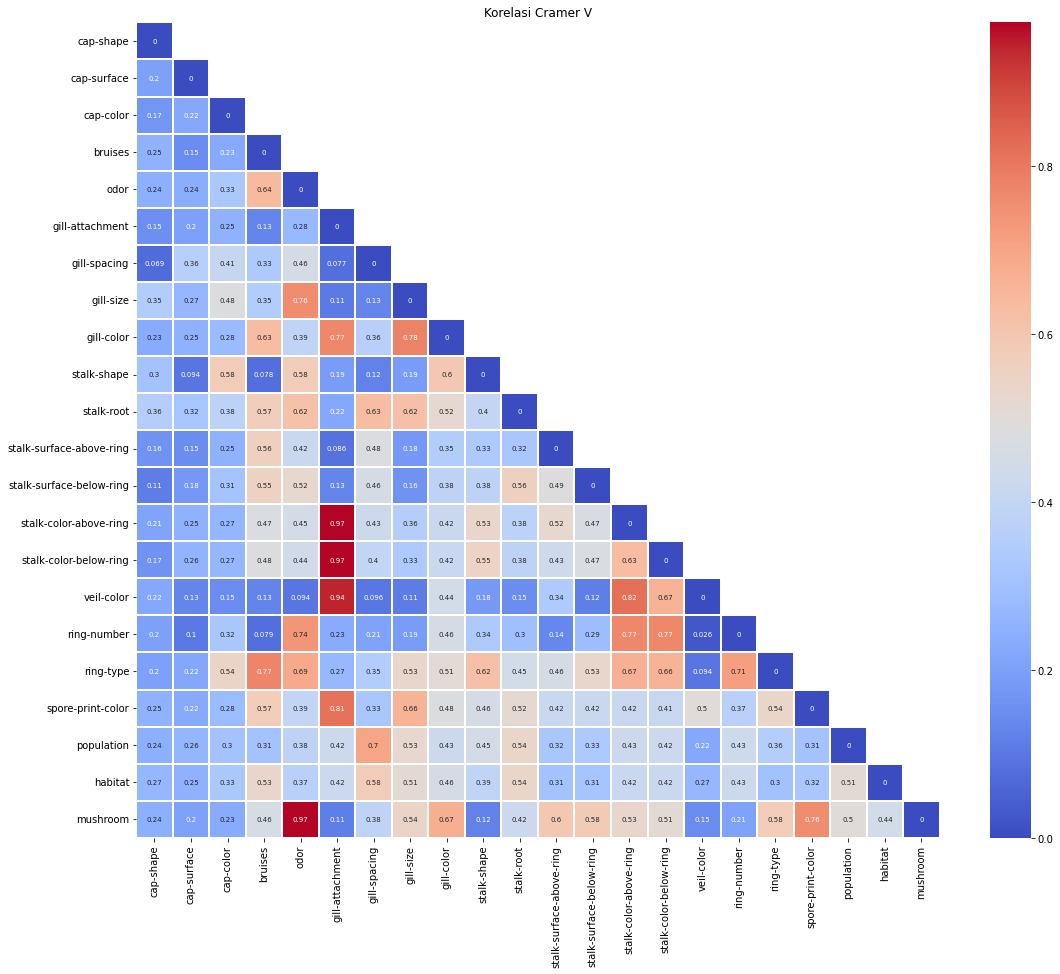

In [31]:
import numpy as np
import scipy.stats as ss
import itertools

def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

cols = list(data.columns)
corrM = np.zeros((len(cols),len(cols)))

for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(data[col1], data[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

mask = np.triu(data.corr()-1)

# plt.figure(figsize=(18,15))
# sns.heatmap(data.corr(),linewidths=.1,cmap="coolwarm", annot=True, annot_kws={"size": 7}, mask= mask)
# plt.yticks(rotation=0);
# #plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')
# Metode Pearson diatas

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(18, 15))
ax = sns.heatmap(corr,linewidths=.1,cmap="coolwarm", annot=True, ax=ax, annot_kws={"size": 7}, mask= mask);
ax.set_title("Korelasi Cramer V")

In [32]:
from sklearn.model_selection import train_test_split

x_train = []
x_test = []
y_train = [] 
y_test = []

for i in range(5):
    x_tr, x_ts, y_tr, y_ts = train_test_split(X, y, train_size=(1.0 - ((i+1)/10)), random_state=10)
    x_train.append(x_tr)
    x_test.append(x_ts)
    y_train.append(y_tr)
    y_test.append(y_ts)

Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

def test_tree(clf, X_train, X_test, Y_train, Y_test, print_res=True):
    clf = clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    precision = metrics.precision_score(Y_test, clf.predict(X_test))
    recall = metrics.recall_score(Y_test, clf.predict(X_test))
    res = (score, precision,recall)
    if print_res:
        print("Accuracy = %f / Precision = %f / Recall = %f" % res)
    return res

clf = DecisionTreeClassifier()
print("Accuration, Precision, Recall rate for Decision Tree:")
for i in range(5):
    print((i+1),". ",end="",sep="")
    test_tree(clf, x_train[i], x_test[i], y_train[i], y_test[i])

# print("Accuration rate for Decision Tree:")
# for i in range(5):
#     clf.fit(x_train[i], y_train[i])
#     y_predict = clf.predict(x_test[i])
#     error = ((y_test[i] != y_predict).sum()/len(y_predict)*100)
#     akurasi = str(100 - error) + "%"
#     print(f"{(i+1)}. Train size {(1.0 - ((i+1)/10))} =", akurasi)

Accuration, Precision, Recall rate for Decision Tree:
1. Accuracy = 1.000000 / Precision = 1.000000 / Recall = 1.000000
2. Accuracy = 1.000000 / Precision = 1.000000 / Recall = 1.000000
3. Accuracy = 1.000000 / Precision = 1.000000 / Recall = 1.000000
4. Accuracy = 1.000000 / Precision = 1.000000 / Recall = 1.000000
5. Accuracy = 1.000000 / Precision = 1.000000 / Recall = 1.000000


In [34]:
# dt = DecisionTreeClassifier(class_weight='balanced',criterion='gini', max_features= None, splitter='best', random_state=42)
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=42)
# dt.fit(X_train_2,y_train_2)

dt = DecisionTreeClassifier(class_weight='balanced',criterion='gini', max_features= None, splitter='best', random_state=10, min_samples_leaf=2)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=10)
dt.fit(X_train_2,y_train_2)

DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=2,
                       random_state=10)

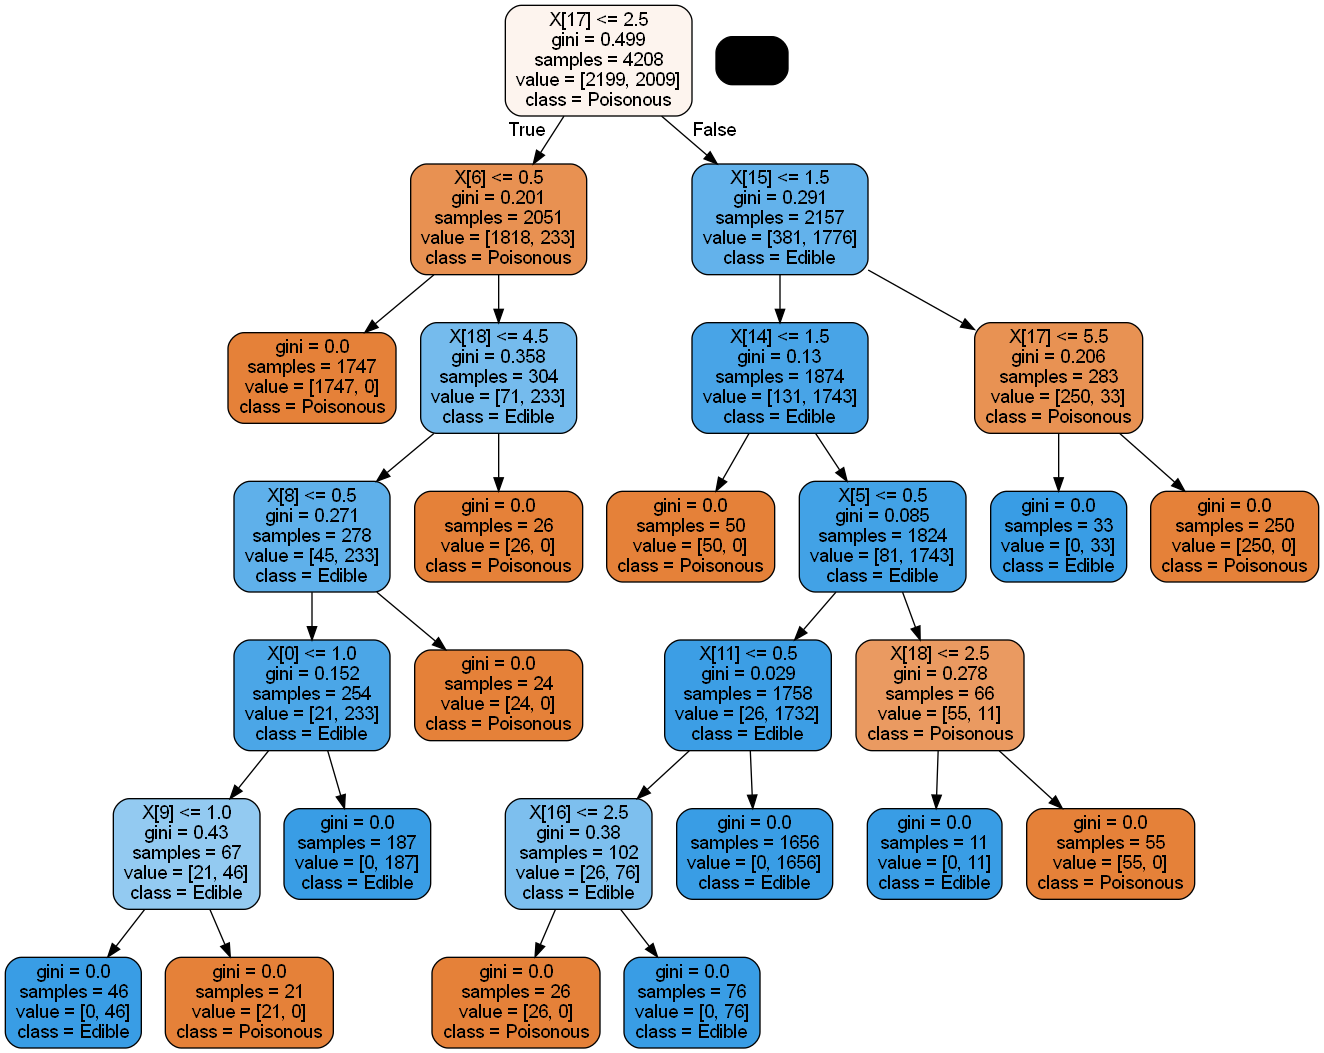

In [35]:
from sklearn import tree
from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(clf, out_file=None,
                                class_names=['Poisonous','Edible'],
                                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [42]:
def predicting(predictor):
    clf = DecisionTreeClassifier()
    clf = clf.fit(X, y)
    Y_pred = clf.predict([predictor])
    chosen = "Edible" if Y_pred == 0 else "Poisonous"
    print('Prediksi untuk X = ', chosen)

predicting([3,8, 0, 0, 1, 1, 1, 10, 1, 1, 3, 3, 7, 7, 2, 1, 4, 1, 4, 6])
predicting([2, 7, 1, 4, 1, 0, 1, 2, 1, 0, 2, 3, 5, 7, 2, 1, 0, 7, 4, 6])

Prediksi untuk X =  Edible
Prediksi untuk X =  Poisonous
